# Figures
Creating the publication figures from the result files.

In [1]:
from __future__ import absolute_import, print_function, division
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cobra
import roadrunner

from IPython.display import display, HTML

import sbmlutils
from sbmlutils import dfba
from sbmlutils.dfba.simulator import simulate_dfba
from sbmlutils.dfba import utils
from sbmlutils.dfba import analysis

analysis.set_matplotlib_parameters()

print('sbmlutils:', sbmlutils.__version__)
print('cobra:', cobra.__version__)
print('roadrunner:', roadrunner.__version__)

print(os.getcwd())

figures_dir = "./__figures__"

sbmlutils: 0.1.8
cobra: 0.9.1
roadrunner: 1.4.24
/home/mkoenig/git/dfba/models


## toy_wholecell (Figure 4)

In [2]:
simulators = ["sbmlutils", "ibiosim"]
mids = ["toy_wholecell_mk_v14-{}_dt0.1_tend50.0".format(s) for s in simulators]
files = [ "./toy_wholecell/{}.csv".format(mid) for mid in mids]
dfs = [pd.read_csv(file) for file in files]
print(files)

['./toy_wholecell/toy_wholecell_mk_v14-sbmlutils_dt0.1_tend50.0.csv', './toy_wholecell/toy_wholecell_mk_v14-ibiosim_dt0.1_tend50.0.csv']


In [3]:
def fig_toy_wholecell(df, mid, simulator):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    plt.subplots_adjust(wspace=0.3)
    kwargs = {}
    for ax in (ax1, ax2):
        if simulator == "sbmlutils":
            ax.plot(df.time, df['[A]'], color='darkred', label="[A]", **kwargs)
            ax.plot(df.time, df['[C]'], color='darkblue', label="[C]", **kwargs)
            ax.plot(df.time, df['[D]'], color='darkgreen', label="[D]", **kwargs)
            ax.plot(df.time, df['[A]']+df['[C]']+df['[D]'], color='black', label="[A]+[C]+[D]", **kwargs)
        elif simulator == "ibiosim":
            ax.plot(df.time, df['A'], color='darkred', label="A", **kwargs)
            ax.plot(df.time, df['C'], color='darkblue', label="C", **kwargs)
            ax.plot(df.time, df['D'], color='darkgreen', label="D", **kwargs)
            ax.plot(df.time, df['A']+df['C']+df['D'], color='black', label="A+C+D", **kwargs)

    ax2.set_yscale('log')

    for ax in (ax1, ax2):
        ax.set_ylabel('Concentrations')

    for ax in (ax1, ax2):
        ax.set_title(mid)
        ax.set_xlabel('time [h]')
        ax.legend()
        if simulator == "ibiosim":
            ax.set_facecolor("lightgray")

    plt.show()
    return fig

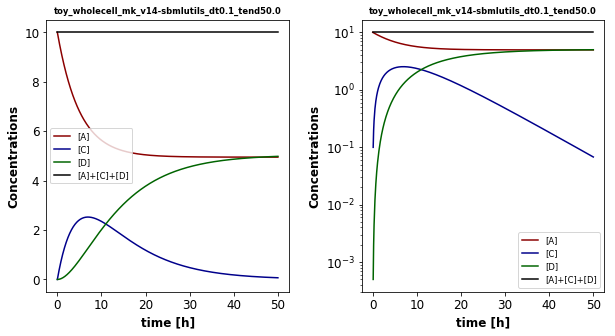

toy_wholecell_mk_v14-sbmlutils_dt0.1_tend50.0


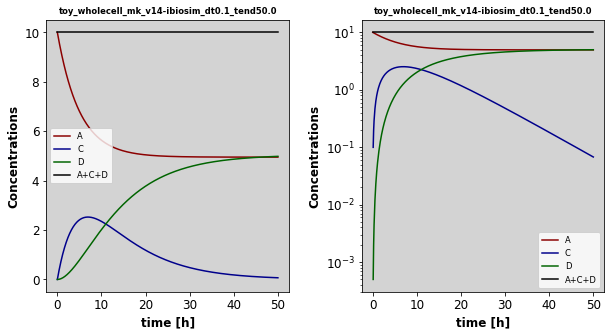

toy_wholecell_mk_v14-ibiosim_dt0.1_tend50.0


In [4]:
for k, simulator in enumerate(simulators):
    mid = mids[k]
    file = files[k]
    df = dfs[k]
    
    fig = fig_toy_wholecell(df, mid, simulator=simulator)
    print(mid)
    fig.savefig('{}/{}.png'.format(figures_dir, mid), bbox_inches='tight')
    fig.savefig('{}/{}.pdf'.format(figures_dir, mid), bbox_inches='tight')

## diauxic_growth (Figure 5)

In [5]:
simulators = ["sbmlutils", "ibiosim"]
mids = ["diauxic_growth_lw_v4-{}_dt0.01_tend15.0".format(s) for s in simulators]
files = [ "./diauxic_growth/{}.csv".format(mid) for mid in mids]
dfs = [pd.read_csv(file) for file in files]
print(files)

['./diauxic_growth/diauxic_growth_lw_v4-sbmlutils_dt0.01_tend15.0.csv', './diauxic_growth/diauxic_growth_lw_v4-ibiosim_dt0.01_tend15.0.csv']


In [6]:
# load data
Varma1994_Fig7 = pd.read_csv('./diauxic_growth/data/Varma1994_Fig7.csv', sep='\t')

In [7]:
def fig_diauxic_growth(df, mid, simulator):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    kwargs = {}
    for ax in (ax1, ax2):
        if simulator == "sbmlutils":
            ax.plot(df.time, df['[Ac]'], color='darkred', label="[Ac]", **kwargs)
            ax.plot(df.time, df['[Glcxt]'], color='darkblue', label="[Glcxt]", **kwargs)
            ax.plot(df.time, df['[O2]'], color='darkgreen', label="[O2]", **kwargs)
        elif simulator == "ibiosim":
            ax.plot(df.time, df['Ac'], color='darkred', label="Ac", **kwargs)
            ax.plot(df.time, df['Glcxt'], color='darkblue', label="Glcxt", **kwargs)
            ax.plot(df.time, df['O2'], color='darkgreen', label="O2", **kwargs)
    # data
    inds = Varma1994_Fig7.substance == 'acetate'    
    ax1.scatter(Varma1994_Fig7.time[inds], Varma1994_Fig7.value[inds], color='darkred', label="Ac data")
    inds = Varma1994_Fig7.substance == 'glucose'
    ax1.scatter(Varma1994_Fig7.time[inds], Varma1994_Fig7.value[inds], color='darkblue', label="Glcxt data")

    for ax in (ax3, ax4):
        if simulator == "sbmlutils":
            ax.plot(df.time, df['[X]'], color='black', label="[X] biomass", **kwargs)
        elif simulator == "ibiosim":
            ax.plot(df.time, df['X'], color='black', label="X biomass", **kwargs)
    # data
    inds = Varma1994_Fig7.substance == 'cell_density'
    ax3.scatter(Varma1994_Fig7.time[inds], Varma1994_Fig7.value[inds], color='black', label="X data")
        
    ax2.set_yscale('log')
    ax2.set_ylim([10E-5, 15])
    ax4.set_yscale('log')

    for ax in (ax1, ax2):
        ax.set_ylabel('Concentrations [mM]')

    for ax in (ax3, ax4):
        ax.set_ylabel('Biomass [g/l]')

    for ax in (ax1, ax2, ax3, ax4):
        ax.set_title(mid)
        ax.set_xlabel('time [h]')
    
    for ax in (ax1, ax2, ax3, ax4):
        ax.legend()
        ax.set_xlim(0, 13)
        if simulator == "ibiosim":
            ax.set_facecolor("lightgray")
    plt.show()
    return fig

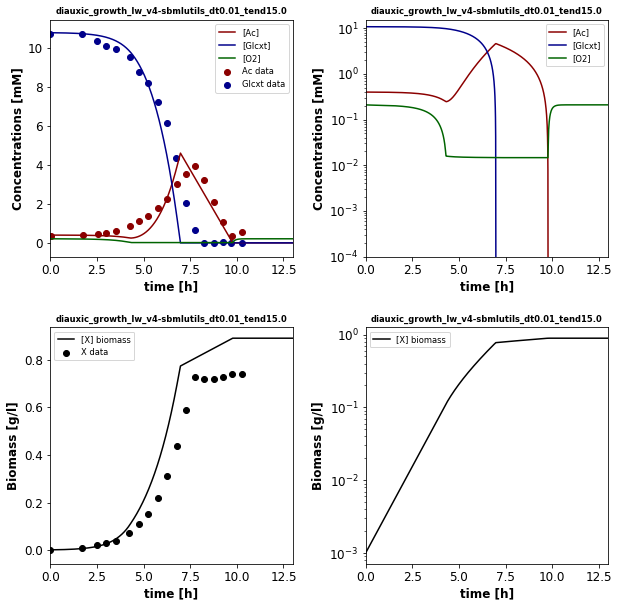

diauxic_growth_lw_v4-sbmlutils_dt0.01_tend15.0


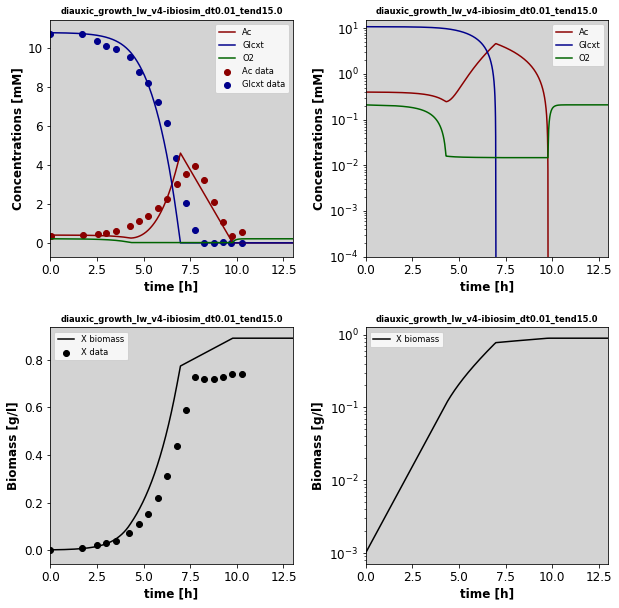

diauxic_growth_lw_v4-ibiosim_dt0.01_tend15.0


In [8]:
for k, simulator in enumerate(simulators):
    mid = mids[k]
    file = files[k]
    df = dfs[k]
    
    fig = fig_diauxic_growth(df, mid, simulator=simulator)
    print(mid)
    fig.savefig('{}/{}.png'.format(figures_dir, mid), bbox_inches='tight')
    fig.savefig('{}/{}.pdf'.format(figures_dir, mid), bbox_inches='tight')